In [1]:
import numpy as np
from scipy.optimize import linprog as lp
from tolsolvty import tolsolvty
from matplotlib import pyplot as plt
%matplotlib inline

In [43]:

path_folder = 'example'

A = np.loadtxt(path_folder + '/infA.txt')

infb = np.loadtxt(path_folder + '/infb.txt', ndmin=2)
supb = np.loadtxt(path_folder + '/supb.txt', ndmin=2)

[tolmax, argmax, envs, ccode] = tolsolvty(A, A, infb, supb)
print('tolmax = ', tolmax)
print('argmax = ', argmax)

 
 Допусковое множество решений интервальной линейной системы пусто 
 
tolmax =  [-1.47963816]
argmax =  [[0.1266034 ]
 [0.40723887]
 [0.07385199]]


In [44]:
A = np.array([[12, 6, 7],
             [12, 6.1, 7],
             [0, 11, 0]])
mid_b = np.array([2.5, 6.5, 2.5])
rad_b = np.array([0.5, 0.5, 0.5])

n = A.shape[0]
c = np.hstack([np.zeros(n), np.ones(n)])

neg_diag = -np.diag(rad_b)
r = np.hstack([-mid_b, mid_b])
A_big = np.block([[-A, neg_diag], [A, neg_diag]])

In [26]:
bounds = [(None, None)] * n + [(0, None)] * n

res_simplex = lp(c, A_big, r, bounds=bounds,
                 method='simplex')
res_ip = lp(c, A_big, r, bounds=bounds,
            method='interior-point')

In [46]:
# simplex

final_x = res_simplex.x[:-n]
final_w = res_simplex.x[n:]

print("Simplex results:")
print(f"X = {final_x}")
print(f"omegas = {final_w}")

# interior point

final_x = res_ip.x[:-n]
final_w = res_ip.x[n:]

print("Interior point results:")
print(f"X = {final_x}")
print(f"omegas = {final_w}")

Simplex results:
X = [0.42613636 0.22727273 0.        ]
omegas = [7.95454545 0.         0.        ]
Interior point results:
X = [0.19401253 0.22727273 0.11307065]
omegas = [3.96656256e+00 3.98798289e+00 5.09742789e-11]


In [34]:
def solve_bounded(x_bounds):
    bounds = x_bounds + [(0, None)] * n

    res_simplex = lp(c, A_big, r, bounds=bounds,
                     method='simplex')
    res_ip = lp(c, A_big, r, bounds=bounds,
                method='interior-point')
    omega_sum_s = sum(res_simplex.x[n:])
    omega_sum_ip = sum(res_ip.x[n:])
    omega_3 = res_simplex.x[-1]
    
    x_s = res_simplex.x[:-n]
    x_ip = res_ip.x[:-n]
    return omega_sum_s, omega_sum_ip, x_s, x_ip, omega_3

In [35]:
x_2 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
x_1s = []
x_3s = []
x_1i = []
x_3i = []
w_3 = []

for lower in x_2:
    bounds = [(None, None), (lower, None), (None, None)]
    omega_sum_s, omega_sum_ip, x_s, x_ip, omega_3 = solve_bounded(bounds)
    print(f"Lower x_2 = {lower}: sum simplex = {omega_sum_s}, sum ip = {omega_sum_ip}, x_s = {x_s}, x_ip = {x_ip}, omega 3 = {omega_3}")
    x_1s.append(x_s[0])
    x_3s.append(x_s[-1])
    x_1i.append(x_ip[0])
    x_3i.append(x_ip[-1])
    #w_3.append(omega_3)
    
(x_1s, x_2, x_3s, x_1i, x_3i, w_3) = (np.array(x) for x in (x_1s, x_2, x_3s, x_1i, x_3i, w_3))

Lower x_2 = 0.1: sum simplex = 7.954545454545454, sum ip = 7.954545451734176, x_s = [0.42613636 0.22727273 0.        ], x_ip = [0.19383803 0.22727273 0.11294209], omega 3 = 0.0
Lower x_2 = 0.2: sum simplex = 7.954545454545455, sum ip = 7.954545429347193, x_s = [0.42613636 0.22727273 0.        ], x_ip = [0.19396595 0.22727273 0.11298888], omega 3 = 0.0
Lower x_2 = 0.3: sum simplex = 9.54, sum ip = 9.539999739129081, x_s = [0.38916667 0.3        0.        ], x_ip = [0.16683515 0.30000001 0.09726964], omega 3 = 1.5999999999999996
Lower x_2 = 0.4: sum simplex = 11.720000000000002, sum ip = 11.719999560160753, x_s = [0.33833333 0.4        0.        ], x_ip = [0.12931996 0.4        0.07542599], omega 3 = 3.8000000000000007
Lower x_2 = 0.5: sum simplex = 13.9, sum ip = 13.900000000338565, x_s = [0.2875 0.5    0.    ], x_ip = [0.09186738 0.5        0.05367494], omega 3 = 6.0
Lower x_2 = 0.6: sum simplex = 16.08, sum ip = 16.080000000293687, x_s = [0.23666667 0.6        0.        ], x_ip = [0.0

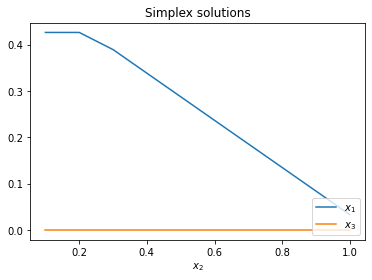

In [36]:
line1, = plt.plot(x_2, x_1s, label='$x_1$')
line2, = plt.plot(x_2, x_3s, label='$x_3$')
plt.legend(handles=[line1, line2], loc='lower right')
plt.title('Simplex solutions')
plt.xlabel('$x_2$')
plt.savefig('simplex.png')
plt.show()
plt.close()

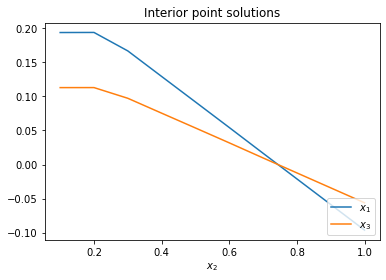

In [37]:
line1, = plt.plot(x_2, x_1i, label='$x_1$')
line2, = plt.plot(x_2, x_3i, label='$x_3$')
plt.legend(handles=[line1, line2], loc='lower right')
plt.title('Interior point solutions')
plt.xlabel('$x_2$')
plt.savefig('interior_point.png')
plt.show()
plt.close()

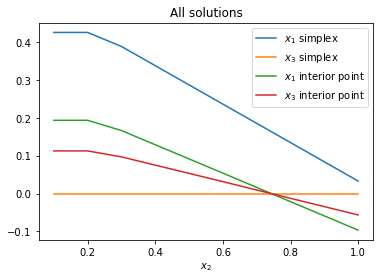

In [38]:
line1, = plt.plot(x_2, x_1s, label='$x_1$ simplex')
line2, = plt.plot(x_2, x_3s, label='$x_3$ simplex')
line3, = plt.plot(x_2, x_1i, label='$x_1$ interior point')
line4, = plt.plot(x_2, x_3i, label='$x_3$ interior point')
plt.legend(handles=[line1, line2, line3, line4], loc='upper right')
plt.title('All solutions')
plt.xlabel('$x_2$')
plt.savefig('all.png')
plt.show()
plt.close()